In [1]:
from funcs import kymo as ky
import PySimpleGUI as sg
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
import matplotlib.lines as mlines


# Prompt user to choose file


path = sg.popup_get_file("", no_window=True, default_extension=".tif")
print("Image path: ",path.replace("/","\\"))
# pixel size: 0.16250000000000003 or 0.189 (pub)
pixel_size = 0.16250000000000003
frame_time = 0.159
exp1 = ky.Kymo(path.replace("/","\\"), pixel_size=pixel_size, frame_time=frame_time)
exp1.generate_kymo(threshold=0.8,dash=False)

Image path:  Z:\qfavey\01_Experiments\01_CSF_FLOW\IMAGING_TESTS\Successful_Images\Inpp5e_A\Inpp5e_A01_cropped.tif
----- Input image: Inpp5e_A01_cropped.tif

Loading from previous processing!
Analyzing Inpp5e_A01_cropped.tif:
threshold: 	0.8 
method: 	Quantile 
filter size: 	None
Detecting and processing blobs for d-v positions: 100.0%
Detected 245 traces.
Done! 




(array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0

In [2]:
from skimage.measure import label, regionprops

kymos = exp1.labeled_img_array.copy()

speed_image = np.zeros_like(kymos,dtype=float)

for id, kymo in enumerate(kymos):
    
    for region in regionprops(kymo):
        # take regions with large enough areas
        if (region.area < 100) and (region.area >= 15) and (region.eccentricity>0.9) and (np.degrees(region.orientation)>-95) and (np.degrees(region.orientation)<95) and (np.round(region.orientation,1)!= 0.0):         
            speed = (np.tan(-region.orientation))*(pixel_size/frame_time) 
            for l,c in zip(range(0,np.shape(speed_image[id])[0]),range(0,np.shape(speed_image[id])[1])):
                for coords in region.coords:
                    #print(l,c,coords[0],coords[1])
                    if l == coords[0] and c == coords[1]:
                        #print(speed)
                        speed_image[id][l][c] = speed
    print(np.max(speed_image[id]))
               
    
                   
tagged = np.swapaxes(speed_image,1,2)
print(np.shape(tagged))
print(np.shape(speed_image))


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.8579587429035342
0.0
0.0
6.354351959513097
23.531393975273023
3.4276698018557417
5.334384184147033
16.695488137213975
5.686532610963227
0.0
3.2590377956519645
0.0
0.0
6.660998221065878
13.750100929433192
0.0
0.0
0.0
343.697352456357
4.960908223817073
10.156592213329258
0.0
0.0
2.7357607923400975
6.593313555084358
1.6509123589501846
0.0
2.927329636365785
167.60597146984122
57.261304840924616
11.938721789876734
94.3241217223599
3.6120904531223172
0.0
24.59001821088074
0.0
9.220772696596434
9.75520722389115
6.506538054337449
1.8186937746236431
7.09631819117905
9.705044766657945


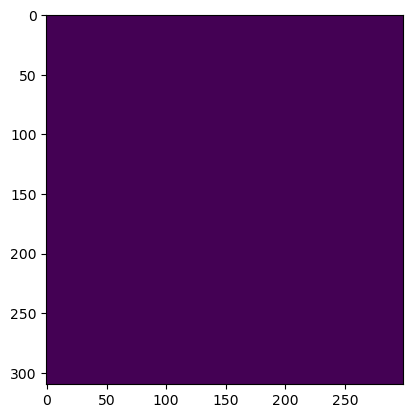

GIF saved to output.gif


In [8]:
plt.imshow(tagged[1])
plt.show()

import imageio
import numpy as np

# Replace this with your array of images
# Make sure each image is a 2D or 3D NumPy array
# For example, images = [image1, image2, ...]


# Specify the file path for the output GIF
output_gif_path = 'output.gif'

# Convert the array of images to a GIF
imageio.mimsave(output_gif_path, tagged.astype(np.uint8), duration=0.5)  # Set duration in seconds between frames

print(f"GIF saved to {output_gif_path}")



343.697352456357


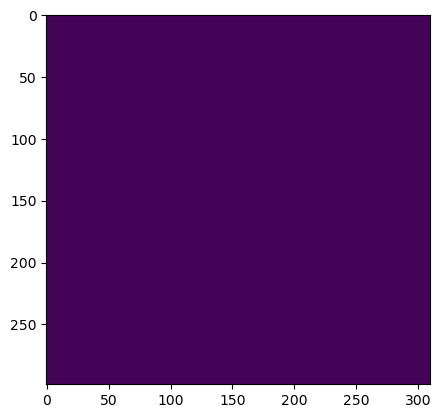

In [4]:
print(np.max(speed_image))

plt.imshow(speed_image[150],vmax=np.max(speed_image))
plt.show()